In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from env import get_db_url
import wrangle_z_c

import test

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.model_selection import learning_curve

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
#acquire data 
train, validate, test = wrangle_z_c.wrangled_zillow()

#acquire split data
train_VC, train_LA, train_OC, validate_VC, validate_LA, validate_OC, test_VC, test_LA, test_OC = wrangle_z_c.split_county_tvt(train, validate, test) 

#acquire scaled data
scaler, train_scaled, validate_scaled, test_scaled = wrangle_z_c.scale_data(train, validate, test, return_scaler = True)

#acquire scaled split data
scaler, train_scaled_VC, train_scaled_LA, train_scaled_OC, validate_scaled_VC, validate_scaled_LA, validate_scaled_OC, test_scaled_VC, test_scaled_LA, test_scaled_OC = wrangle_z_c.scale_split_data(train, validate, test, return_scaler = True)

train.head()

Acquiring from SQL database


,prop_land_id,heatingorsystemtypeid,parcelid,id,bathrooms,bedrooms,building_quality_id,calculated_bath_bed,area,finishedsquarefeet12,...,log_error,transactiondate,heating_desc,property_desc,bed_and_bath,year_built_binned,county_OC,county_VC,pw_build,pw_build_encoded
51923,266.00,2.00,11576268,1972983,3.00,3.00,7.00,3.00,"1,452.00","1,452.00",...,0.05,2017-07-11,Central,Condominium,6.00,1980,0,0,True,1
42249,266.00,2.00,10945338,1195223,3.00,2.00,8.00,3.00,"1,126.00","1,126.00",...,-0.01,2017-06-12,Central,Condominium,5.00,1980,0,0,True,1
39884,261.00,7.00,12126847,573060,2.00,3.00,6.00,2.00,"1,443.00","1,443.00",...,0.00,2017-06-02,Floor/Wall,Single Family Residential,5.00,1950,0,0,True,1
71866,261.00,2.00,11270523,1942199,3.00,5.00,7.00,3.00,"2,956.00","2,956.00",...,0.10,2017-09-19,Central,Single Family Residential,8.00,1980,0,0,True,1
13043,261.00,2.00,10956019,151237,1.00,2.00,4.00,1.00,836.00,836.00,...,0.01,2017-03-02,Central,Single Family Residential,3.00,1950,0,0,True,1


In [3]:
train.isna().sum()

prop_land_id                 0
heatingorsystemtypeid        0
parcelid                     0
id                           0
bathrooms                    0
bedrooms                     0
building_quality_id          0
calculated_bath_bed          0
area                         0
finishedsquarefeet12         0
county                       0
full_bath_cnt                0
latitude                     0
longitude                    0
lot_size                     0
propertycountylandusecode    0
propertyzoningdesc           0
census_tract                 0
region_id_city               0
region_id_county             0
zip_code                     0
room_count                   0
unit_count                   0
year_built                   0
tax_value                    0
taxvaluedollarcnt            0
assessment_year              0
landtaxvaluedollarcnt        0
tax_amount                   0
census_tract_block           0
transaction_date             0
id                           0
parcelid

In [4]:
train.id

,id,id
51923,1972983,55934
42249,1195223,45601
39884,573060,43055
71866,1942199,77341
13043,151237,14144
...,...,...
22670,2374372,24513
54829,1783085,59046
40438,785248,43652
38945,2424230,42043


In [13]:
train.parcel_id

,parcel_id,parcel_id
51923,11576268,11576268
42249,10945338,10945338
39884,12126847,12126847
71866,11270523,11270523
13043,10956019,10956019
...,...,...
22670,11213975,11213975
54829,12547302,12547302
40438,12987747,12987747
38945,12672093,12672093


In [4]:
train.shape

(13521, 43)

In [5]:
validate.shape

(5796, 43)

In [6]:
test.shape

(4830, 43)

- Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- Answer those questions through a mix of statistical tests and visualizations.

- Bonus:

    - Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error. 

#### Does bedroom count impact log error?

<AxesSubplot:xlabel='bedrooms', ylabel='log_error'>

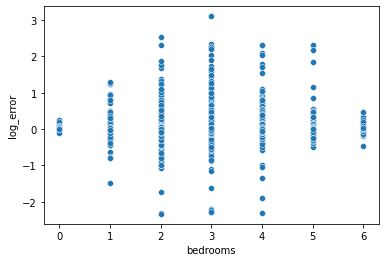

In [9]:
sns.scatterplot(data = train, x = 'bedrooms', y = 'log_error')

<AxesSubplot:xlabel='bedrooms', ylabel='log_error'>

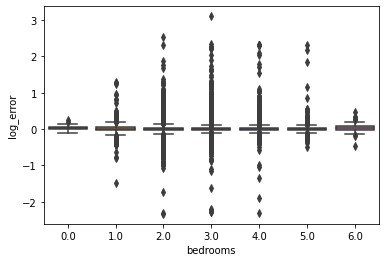

In [10]:
sns.boxplot(data = train, x = 'bedrooms', y = 'log_error')

### Is there a relationship between bathrooms and log error?

<AxesSubplot:xlabel='bathrooms', ylabel='log_error'>

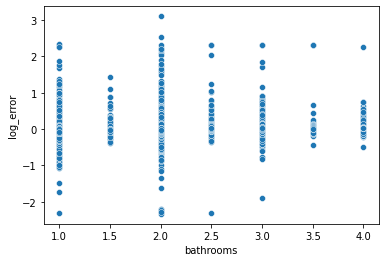

In [20]:
sns.scatterplot(data = train, x = 'bathrooms', y = 'log_error')

<AxesSubplot:xlabel='bathrooms', ylabel='log_error'>

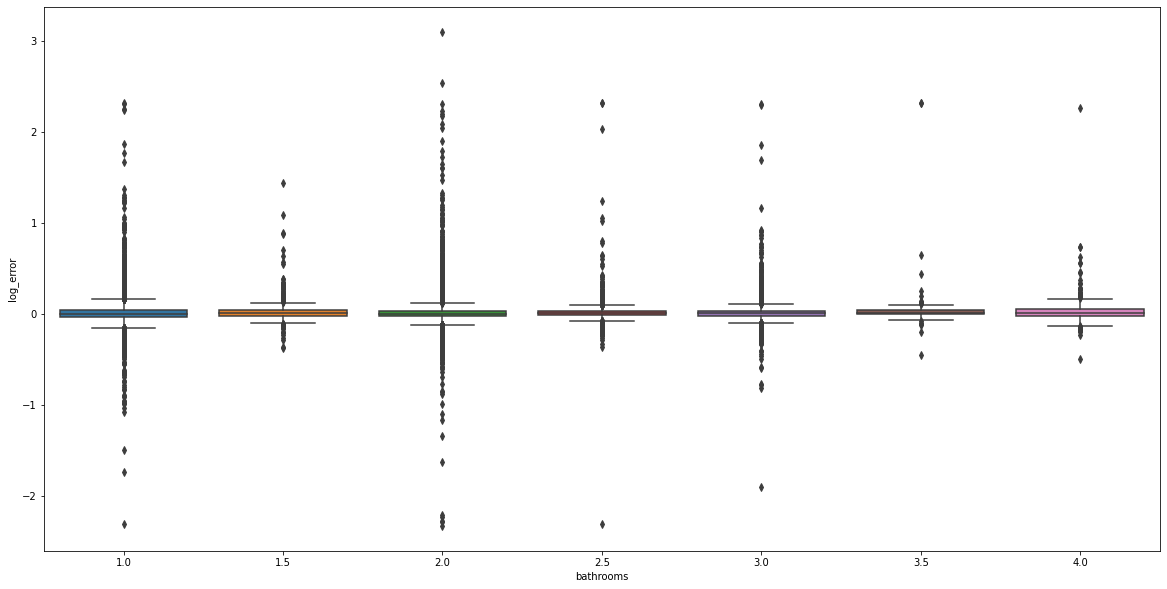

In [38]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = train, x = 'bathrooms', y = 'log_error')

### Does Log Error differ among county?

<AxesSubplot:xlabel='county', ylabel='log_error'>

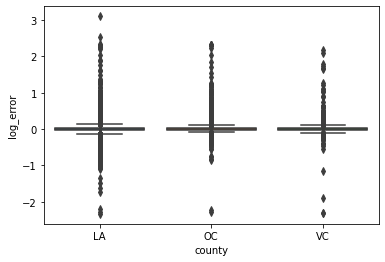

In [14]:
sns.boxplot(data = train, x = 'county', y = 'log_error' )

### Is there a relationship between log error and years?

<AxesSubplot:xlabel='year_built', ylabel='log_error'>

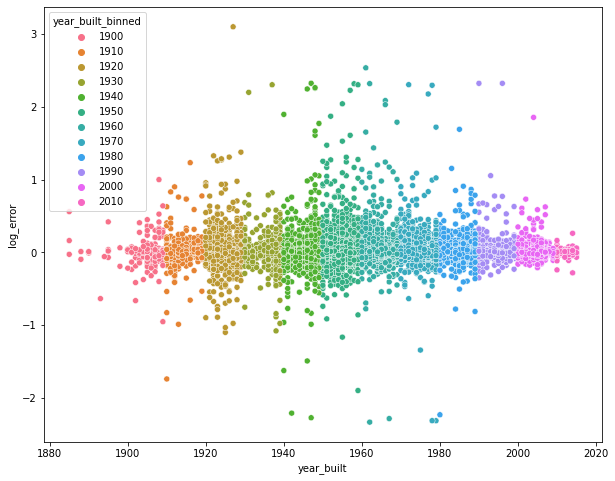

In [18]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = train, x = 'year_built', y = 'log_error', hue = 'year_built_binned')

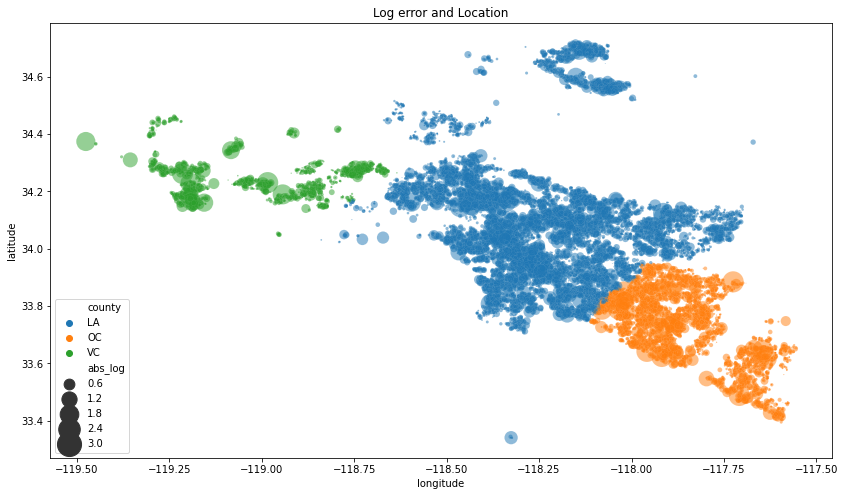

In [34]:


train['abs_log'] = train.log_error.apply(lambda x: x if x >= 0 else -x)

plt.figure(figsize=(14,8))
sns.scatterplot(data = train, x = 'longitude', y = 'latitude', hue = 'county', size = 'abs_log', sizes = (0,600), alpha = 0.50, edgecolor = k)
plt.legend()
plt.title('Log error and Location')
plt.show()

<AxesSubplot:xlabel='tax_value', ylabel='log_error'>

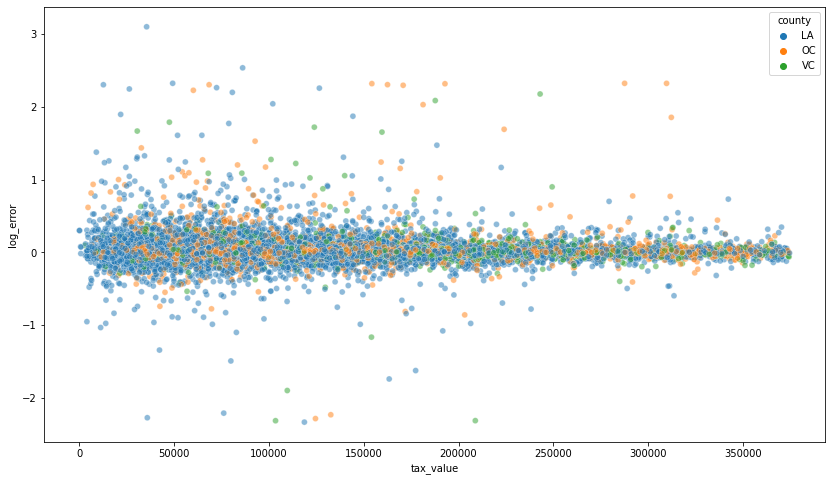

In [42]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = train, x = 'tax_value', y = 'log_error', hue = 'county', alpha = 0.5)

<AxesSubplot:xlabel='area', ylabel='log_error'>

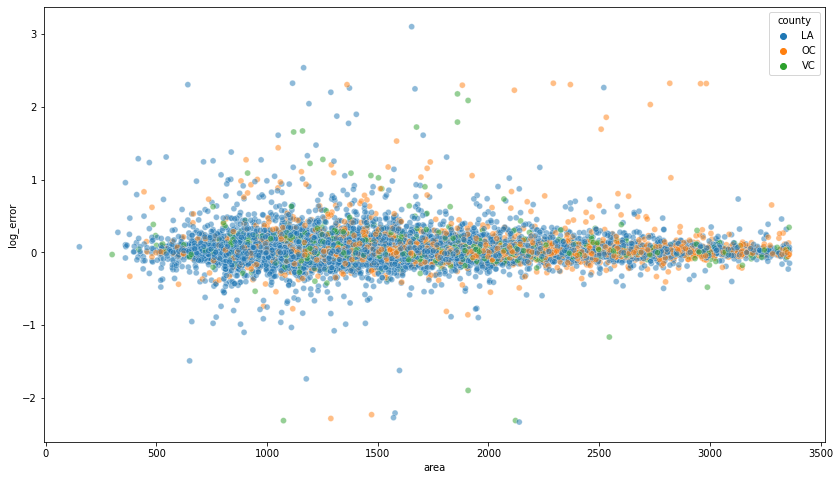

In [43]:
plt.figure(figsize = (14, 8))
sns.scatterplot(data = train, x = 'area', y = 'log_error', hue = 'county', alpha = 0.5)

In [5]:
train.county.value_counts()

LA    13993
OC     5892
VC     2052
Name: county, dtype: int64

In [6]:
train.groupby('county')['log_error'].mean()

county
LA                   0.00
OC                   0.01
VC                   0.01
Name: log_error, dtype: float64

mapped_counties = train.copy()

mapped_counties['county'] = 

In [7]:
x = train_scaled[['county_VC', 'county_OC']].copy()

In [80]:
#x = x.dropna()

In [85]:
#train_scaled = train_scaled.dropna()

In [73]:
x.isna().value_counts()

bedrooms  bathrooms  year_built
False     False      False         24979
                     True              5
dtype: int64

In [56]:
x.shape

(24984, 3)

In [58]:
x.bathrooms.isna().sum()

0

In [59]:
x.bedrooms.isna().sum()

0

(15521, 3)

In [84]:
x.shape

(24979, 3)

In [8]:
wcss = []

for i in range (1, 7):
    kmeans = KMeans(i, random_state = 123)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

Text(0, 0.5, 'Within-cluster Sum of Squares')

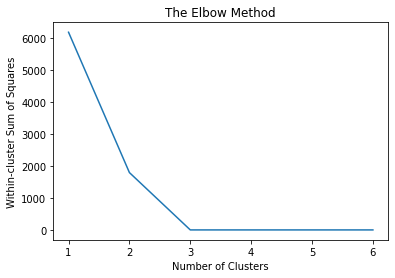

In [9]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

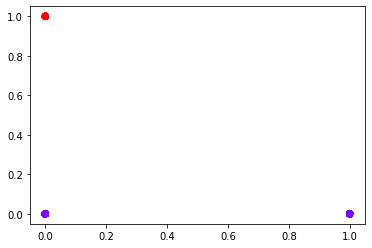

In [14]:
kmeans = KMeans(2, random_state = 123) #number of clusters I want to produce

#fit on x
kmeans.fit(x)

#predict
identified_clusters = kmeans.fit_predict(x)

#create copy of data
data_with_clusters = train_scaled.copy()

#add new column with cluster predictions
data_with_clusters["cluster"] = identified_clusters

#plot
plt.scatter(data_with_clusters["longitude"],
            data_with_clusters["latitude"], 
            c = data_with_clusters["cluster"], 
            cmap = 'rainbow')

#plt.xlim(-180, 180)
#plt.ylim(-90, 90)
plt.show()

In [16]:
#create new variable 
data_mapped = train.copy()

#map counties column with numbers
data_mapped["county_mapped"] = data_mapped["county"].map({'LA': 0, 'OC': 1, 'VC': 2})

data_mapped

,prop_land_id,heatingorsystemtypeid,parcelid,id,bathrooms,bedrooms,building_quality_id,calculated_bath_bed,area,finishedsquarefeet12,...,transactiondate,heating_desc,property_desc,bed_and_bath,year_built_binned,county_OC,county_VC,pw_build,pw_build_encoded,county_mapped
41296,266.00,2.00,11570016,1839093,2.00,2.00,8.00,2.00,"1,673.00","1,673.00",...,2017-06-08,Central,Condominium,4.00,1990,0,0,True,1,0
62825,261.00,NaN,14185465,1160041,2.50,4.00,NaN,2.50,"2,134.00","2,134.00",...,2017-08-17,None,Single Family Residential,6.50,1960,1,0,True,1,1
38443,261.00,7.00,13016790,99376,1.00,2.00,4.00,1.00,"1,363.00","1,363.00",...,2017-05-31,Floor/Wall,Single Family Residential,3.00,1920,0,0,False,0,0
43661,261.00,2.00,11325918,1644065,1.00,3.00,6.00,1.00,"1,866.00","1,866.00",...,2017-06-16,Central,Single Family Residential,4.00,1950,0,0,True,1,0
14143,261.00,NaN,14412102,832840,3.00,3.00,NaN,3.00,"2,467.00","2,467.00",...,2017-03-08,None,Single Family Residential,6.00,1980,1,0,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53656,261.00,NaN,14493132,1190918,2.00,3.00,NaN,2.00,"1,112.00","1,112.00",...,2017-07-17,None,Single Family Residential,5.00,1970,1,0,True,1,1
49941,261.00,2.00,13069184,2545201,3.00,3.00,8.00,3.00,"1,933.00","1,933.00",...,2017-07-03,Central,Single Family Residential,6.00,1980,0,0,True,1,0
3161,261.00,NaN,14475835,2369059,3.00,3.00,NaN,3.00,"2,053.00","2,053.00",...,2017-01-17,None,Single Family Residential,6.00,1970,1,0,True,1,1
16831,261.00,7.00,10841075,1239625,3.00,3.00,6.00,3.00,"1,924.00","1,924.00",...,2017-03-17,Floor/Wall,Single Family Residential,6.00,1940,0,0,False,0,0


In [6]:
X_train_scaled = train[['year_built', 'area', 'bedrooms', 'bathrooms',  'latitude', 'longitude']].copy()
y_train = train['log_error'].copy()

from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 3 features
f_selector = SelectKBest(f_regression, k = 3)

# find the top 3 X's correlated with y
f_selector.fit(X_train_scaled, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()

f_feature



['area', 'bedrooms', 'bathrooms']

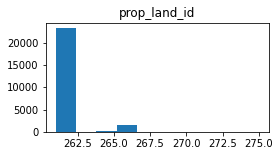

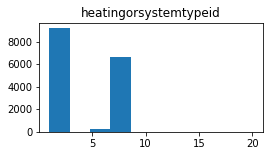

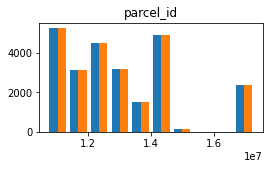

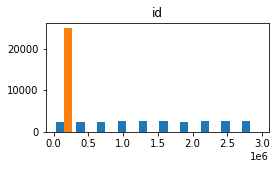

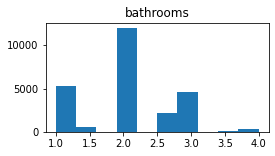

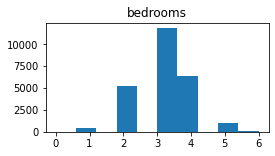

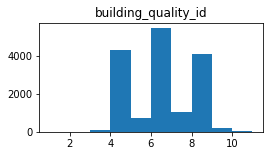

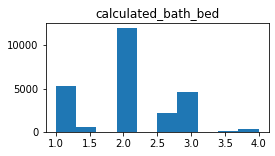

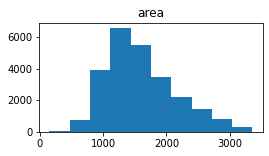

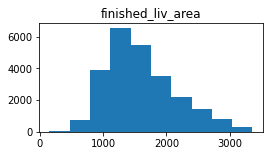

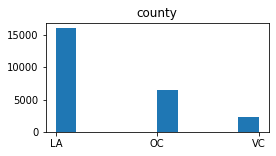

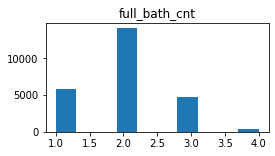

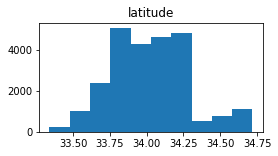

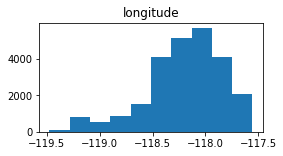

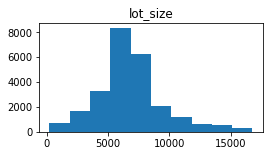

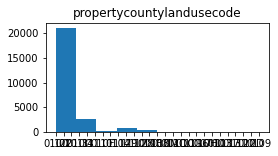

TypeError: 'value' must be an instance of str or bytes, not a None

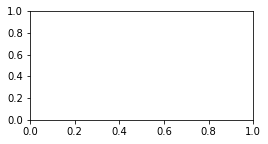

In [11]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()